## Generador ejemplos para los modelos del Trabajo de Fin de Grado
### Antonio Sevilla

In [36]:
# Importamos librerías y fijamos semilla para la generación pseudoaleatoria
import random
import math
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
random.seed(101)

In [37]:
def gen_tree(num_nodos):
    """
    genera un árbol con la cantidad de  num_nodos
    """
    list_nodos = list(range(num_nodos))
    conectados = [0]
    no_conectados = list_nodos[1:]
    G = []
    # consideramos en la componente ya conectada solo el nodo inicial
    while not (set(list_nodos) == set(conectados)):
        # en cada iteración creamos un arco que va de un nodo aleatorio de la componente conectada a otro nodo aleatorio desconectado
        a = conectados[random.randint(0, len(conectados)-1)]
        b = no_conectados[random.randint(0, len(no_conectados)-1)]
        if a!=b:
            # actualizamos las componentes en consecuencia
            conectados.append(b)
            no_conectados.remove(b)
            conectados = list(set(conectados))
            new_conex = tuple(sorted((a,b)))
            G.append(new_conex)

    return G

In [38]:
gen_tree(7)

[(0, 5), (4, 5), (0, 2), (2, 3), (1, 4), (2, 6)]

In [39]:
def draw_graph(graph):
    """
    dado un grafo como lista de sus arcos, lo representa
    """
    G = nx.Graph()
    for edge in graph:
        G.add_edge(edge[0], edge[1])
    pos = nx.shell_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="#77DDC0")
    plt.show()

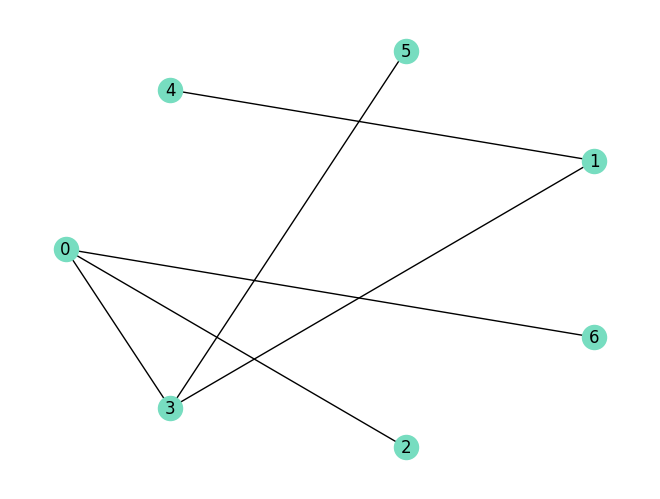

In [40]:
draw_graph(gen_tree(7))

In [41]:
def cut(result, num_cut):
    """ 
    dado un grafo como la lista de sus arcos y num_cut, elimina la cantidad num_cut de conexiones del mismo
    """
    for i in range(num_cut):
        a = random.randint(1, len(result) - 1)
        result.pop(a)
    return result

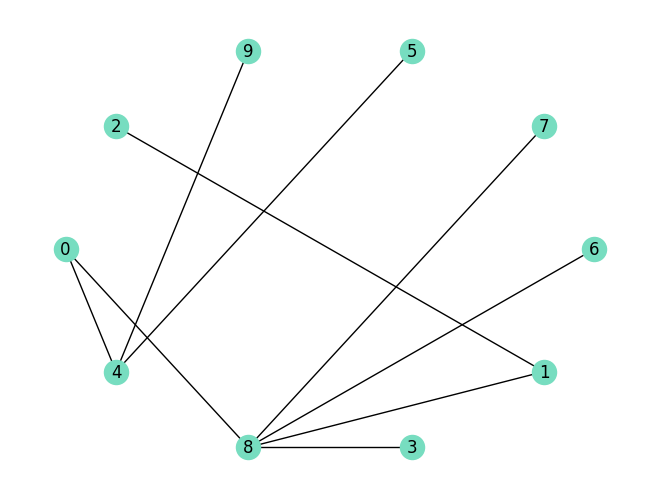

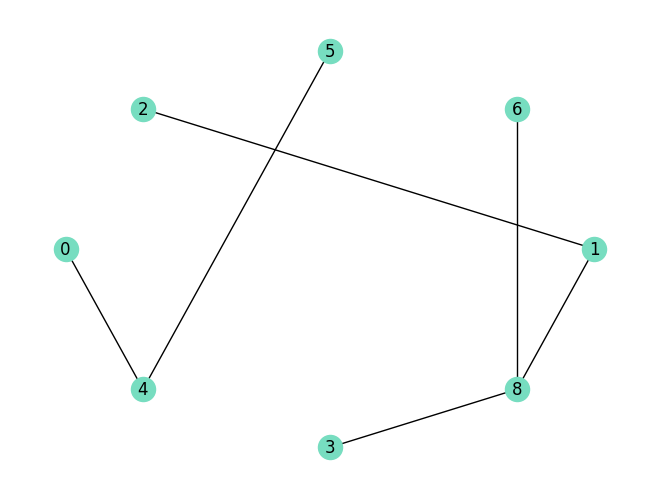

In [42]:
G = gen_tree(10)
draw_graph(G)
G_cut = cut(G,3)
draw_graph(G_cut)

In [43]:
def gen_dense(num_nodos, num_dense):
    """ 
    en lugar de generar un árbol cortado, genera un árbol al que se le añaden num_dense arcos distintos entre parejas aleatorias de nodos
    """
    G = gen_tree(num_nodos)
    for d in range(num_dense):
        a = random.randint(0, num_nodos-1)
        b = random.randint(0, num_nodos-1)
        while a==b or tuple(sorted((a,b))) in G:
            a = random.randint(0, num_nodos-1)
            b = random.randint(0, num_nodos-1)
        G.append(tuple(sorted((a,b))))
    return G

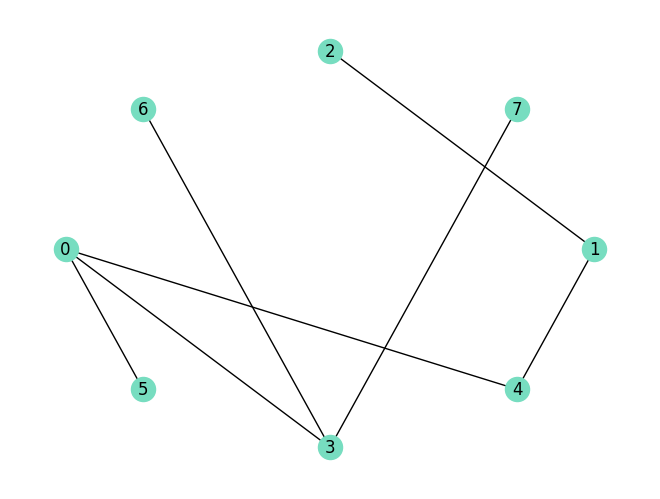

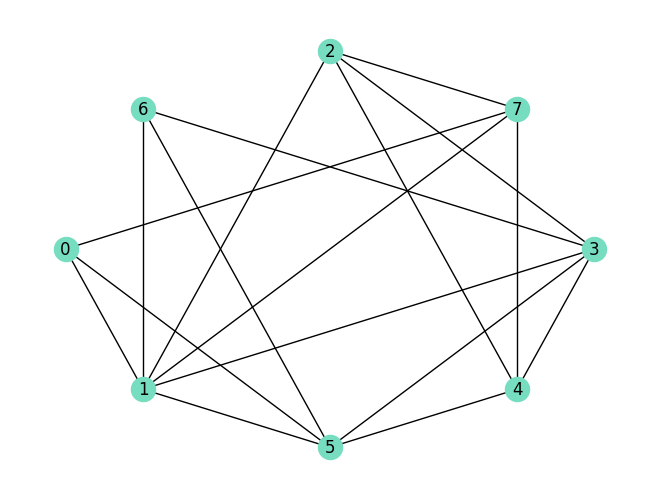

In [44]:
G = gen_tree(8)
draw_graph(G)
G_dense = gen_dense(8,10)
draw_graph(G_dense)

In [45]:
def G_to_matrix(dim, G):
    """ 
    dado un grafo como lista de sus arcos y su dimensión, devuelve su matriz de adyacencia como lista de listas
    """
    result = []
    for i in range(dim):
        result.append([])
        for j in range(dim):
            result[i].append(0)
    for tupla in G:
        result[tupla[0]][tupla[1]] = 1
        result[tupla[1]][tupla[0]] = 1
    return result

In [46]:
G_to_matrix(7,gen_tree(7))

[[0, 1, 0, 0, 0, 1, 1],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 1, 0, 0]]

In [47]:
def gen_example(num_nodos, num_cut, num_dense, min_prob_rute, range_len_rute):
    """
    genera un ejemplo para los modelos
    tiene formato diccionario
    "num_nodos": num_nodos, "num_cut": num_cut, "min_prob_rute": min_prob_rute,"E": E, "U": U, "P": P, "Dist": Dist

    el grafo asociado será un arbol de num_nodos nodos cortado en num_cut arcos
    el factor fiabilidad de cada arco está aleatorizado con probabilidad mínima min_prob_rute
    la distancia de cada arco también lo está, es un valor entero en el rango range_len_rute

    el grafo resultante es denso, tiene num_nodos + num_dense arcos existentes
    y num_nodos + num_dense - num_cut arcos habilitados
    """

    G = gen_dense(num_nodos, num_dense)
    E = G_to_matrix(num_nodos, G)
    
    G_cut = cut(G,num_cut)
    U = G_to_matrix(num_nodos, G_cut)

    P, Dist = [], []
    for i in range(num_nodos):
        P.append([])
        Dist.append([])
        for j in range(num_nodos):
            P[i].append(1)
            Dist[i].append(0)   
    for tupla in G:
        w = round(random.random(),2)
        while w <= min_prob_rute:
            w = round(random.random(),2)
        dis = random.randint(range_len_rute[0], range_len_rute[1])
        P[tupla[0]][tupla[1]] = w
        P[tupla[1]][tupla[0]] = w
        Dist[tupla[0]][tupla[1]] = dis
        Dist[tupla[1]][tupla[0]] = dis
    
    return {"num_nodos":num_nodos, "num_cut": num_cut, "num_dense": num_dense, "min_prob_rute": min_prob_rute,"E":E, "U":U, "P":P, "Dist":Dist}

In [48]:
gen_example(num_nodos=7, num_cut=2, num_dense=0, min_prob_rute=0.8, range_len_rute=[1,5])

{'num_nodos': 7,
 'num_cut': 2,
 'num_dense': 0,
 'min_prob_rute': 0.8,
 'E': [[0, 0, 0, 0, 1, 0, 1],
  [0, 0, 0, 0, 1, 1, 0],
  [0, 0, 0, 1, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 1],
  [1, 1, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0],
  [1, 0, 0, 1, 0, 0, 0]],
 'U': [[0, 0, 0, 0, 1, 0, 1],
  [0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1],
  [1, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 1, 0, 0, 0]],
 'P': [[1, 1, 1, 1, 0.86, 1, 0.99],
  [1, 1, 1, 1, 0.92, 1, 1],
  [1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 0.9],
  [0.86, 0.92, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1],
  [0.99, 1, 1, 0.9, 1, 1, 1]],
 'Dist': [[0, 0, 0, 0, 2, 0, 4],
  [0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 5],
  [2, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0],
  [4, 0, 0, 5, 0, 0, 0]]}

In [49]:
def repr_matrix(matrix):
    """
    dada una matriz pasada como lista de listas, la devuelve formateada como el texto de una Table de Gams
    """
    result = " "
    for i in range(0, len(matrix)):
        result += "    " + " "*(1- (len(str(i))-1)) + str(i)
    for j in range(0, len(matrix)):
        result += "\n" + str(j) + "    " + " "*(1- (len(str(j))-1))
        for k in range(0, len(matrix)):
            result += str(matrix[j][k])
            for esp in range(6 - len(str(matrix[j][k]))):
                result += " "
    result += "\n;\n"
    return(result)

In [50]:
repr_matrix(G_to_matrix(7,gen_tree(7)))

'      0     1     2     3     4     5     6\n0     0     1     0     0     1     0     0     \n1     1     0     0     0     0     0     0     \n2     0     0     0     0     1     0     0     \n3     0     0     0     0     1     0     0     \n4     1     0     1     1     0     0     1     \n5     0     0     0     0     0     0     1     \n6     0     0     0     0     1     1     0     \n;\n'

In [51]:
def format_gams(dict_matrix):
    """
    genera el código de ejemplo a copiar en un archivo .gms para los modelos
    a través de un ejemplo pasado como diccionario
    """
    result = "* Matrices de ejemplo generadas con la versión del programa del 15-05-23\n"
    result += "* [num_nodos, num_cut, num_dense, min_prob_rute] = [" + str(dict_matrix["num_nodos"]) + ", " + \
                str(dict_matrix["num_cut"]) + ", " + str(dict_matrix["num_dense"]) + ", " + str(dict_matrix["min_prob_rute"])  + "]\n \n"
    result += "Table E(i,j) Existe el arco de i a j.\n"
    result += repr_matrix(dict_matrix["E"])
    result += "Table U(i,j) El inicio es utilizable el arco de i a j.\n"
    result += repr_matrix(dict_matrix["U"])
    result += "Table dist(i,j) Distancia de las rutas de i a j\n"
    result += repr_matrix(dict_matrix["Dist"])
    result += "Table coste_rehabilitacion(i,j) Coste de rehabilitar el arco de i a j.\n"
    result += repr_matrix(dict_matrix["Dist"])
    result += "Table P(i,j) Probabilidad de que se pueda utilizar el arco de i a j.\n"
    result += repr_matrix(dict_matrix["P"])
    print(result)
    #return result

In [53]:
print(format_gams(gen_example(num_nodos=6, num_cut=2, num_dense=6, min_prob_rute=0.7, range_len_rute=[1,20])))

* Matrices de ejemplo generadas con la versión del programa del 15-05-23
* [num_nodos, num_cut, num_dense, min_prob_rute] = [6, 2, 6, 0.7]
 
Table E(i,j) Existe el arco de i a j.
      0     1     2     3     4     5
0     0     0     0     1     1     1     
1     0     0     1     1     1     1     
2     0     1     0     1     1     0     
3     1     1     1     0     1     1     
4     1     1     1     1     0     0     
5     1     1     0     1     0     0     
;
Table U(i,j) El inicio es utilizable el arco de i a j.
      0     1     2     3     4     5
0     0     0     0     1     1     1     
1     0     0     1     0     1     0     
2     0     1     0     1     1     0     
3     1     0     1     0     1     1     
4     1     1     1     1     0     0     
5     1     0     0     1     0     0     
;
Table dist(i,j) Distancia de las rutas de i a j
      0     1     2     3     4     5
0     0     0     0     6     14    8     
1     0     0     17    0     17    0    